# Sentiments Index

#### Graph

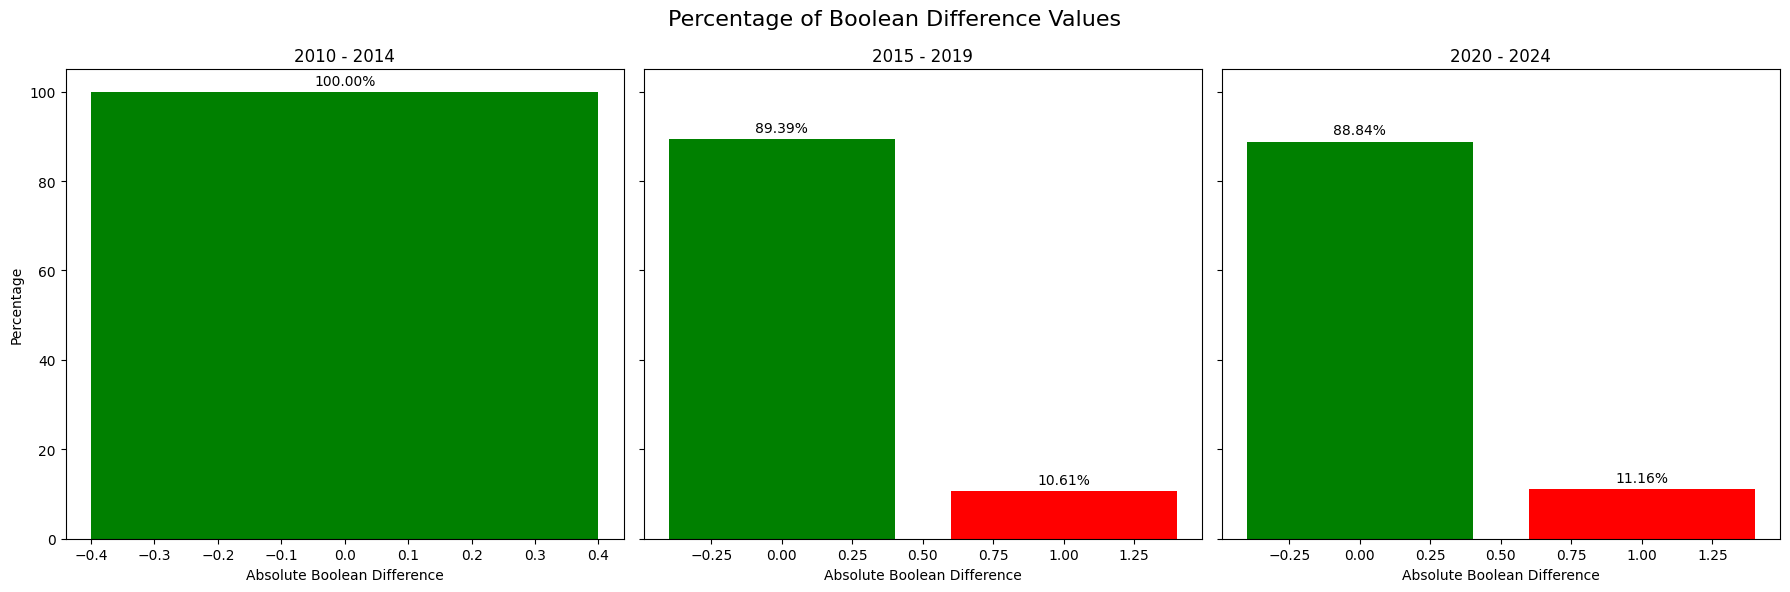

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# function to calculate the percentage of boolean_difference values
def calculate_percentage(df):
    total_count = df['boolean_difference'].value_counts()
    percentage = (total_count / len(df)) * 100
    return percentage.sort_index()

# read the Excel file
file_path = 'rerun.xlsx'
sheets = ['2010 - 2014', '2015 - 2019', '2020 - 2024']

# read the data from each sheet
dataframes = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets}

# calculate percentages for each dataframe
percentages = {sheet: calculate_percentage(df) for sheet, df in dataframes.items()}

# plotting the bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

colors = ['green', 'red']

for ax, (sheet, percentage) in zip(axes, percentages.items()):
    bars = ax.bar(percentage.index, percentage.values, color=colors)
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

    ax.set_xlabel('Absolute Boolean Difference')
    ax.set_ylabel('Percentage' if ax == axes[0] else '')
    ax.set_title(f'{sheet}')

# adjust layout and show the plot
fig.suptitle('Percentage of Boolean Difference Values', fontsize=16)
plt.tight_layout()
plt.show()


## Final Market Sentiments

In [5]:
file_path = 'rerun.xlsx'

processed_dfs = []
sheet_names = pd.ExcelFile(file_path).sheet_names

for sheet in sheet_names:
    # read the sheet into a DataFrame
    df = pd.read_excel(file_path, sheet_name=sheet)
    
    # select the 'Date' and 'sentiment' columns
    df = df[['Date', 'sentiment']]
    
    # rename the 'sentiment' column to 'Sentiments'
    df.rename(columns={'sentiment': 'Sentiments'}, inplace=True)
    
    # slicing the 'Date' column
    df['Date'] = df['Date'].str[:10]
    
    # ensure the 'Sentiments' column is numerical
    df['Sentiments'] = pd.to_numeric(df['Sentiments'], errors='coerce')
    
    # append the processed DataFrame to the list
    processed_dfs.append(df)

# concatenate all processed DataFrames
final_df = pd.concat(processed_dfs, ignore_index=True)

# display the processed DataFrame
print(final_df.head())

# save the processed DataFrame to a new Excel file
final_df.to_excel('rerun_sentiments.xlsx', sheet_name='master',index=False)


         Date  Sentiments
0  2013-08-06    0.800000
1  2011-09-01    0.800000
2  2010-05-21    0.800000
3  2014-06-04    0.400000
4  2014-11-25    0.066667


### Monthly

In [6]:
import pandas as pd

file_path = 'rerun_sentiments.xlsx'
df = pd.read_excel(file_path, sheet_name='master')

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df['Month'] = df['Date'].dt.to_period('M')
grouped = df.groupby('Month').agg(
    Average_Sentiment=('Sentiments', 'mean'),
    Frequency=('Sentiments', 'count')
).reset_index()

with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    grouped.to_excel(writer, sheet_name='monthly sentiments', index=False)


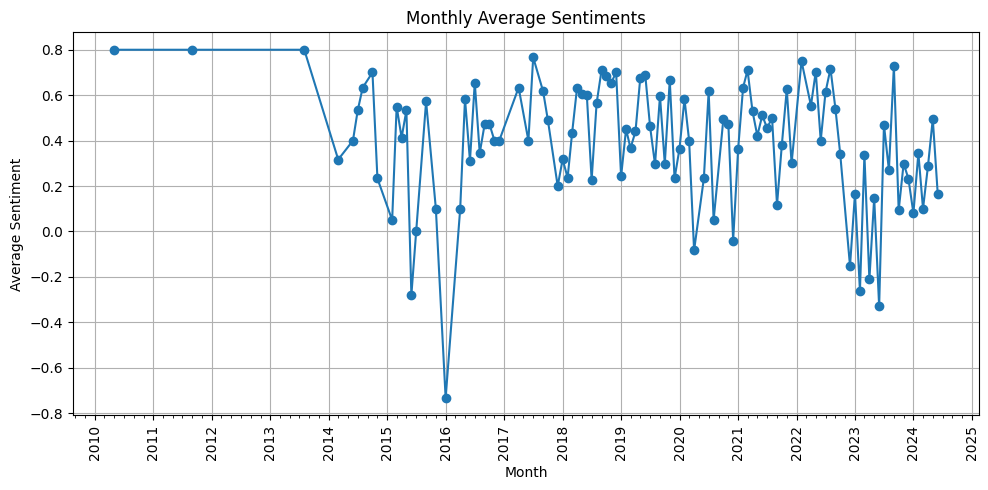

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_path = 'rerun_sentiments.xlsx'
monthly_sentiments = pd.read_excel(file_path, sheet_name='monthly sentiments')

monthly_sentiments['Month'] = pd.to_datetime(monthly_sentiments['Month'])

plt.figure(figsize=(10, 5))
plt.plot(monthly_sentiments['Month'], monthly_sentiments['Average_Sentiment'], marker='o')
plt.title('Monthly Average Sentiments')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator([1, 3, 5, 7, 9, 11]))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Month on Month

In [13]:
import pandas as pd

file_path = 'rerun_sentiments.xlsx'
monthly_sentiments = pd.read_excel(file_path, sheet_name='monthly sentiments')

monthly_sentiments['Percentage Change'] = monthly_sentiments['Average_Sentiment'].pct_change()

with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    monthly_sentiments.to_excel(writer, sheet_name='monthly sentiments', index=False)


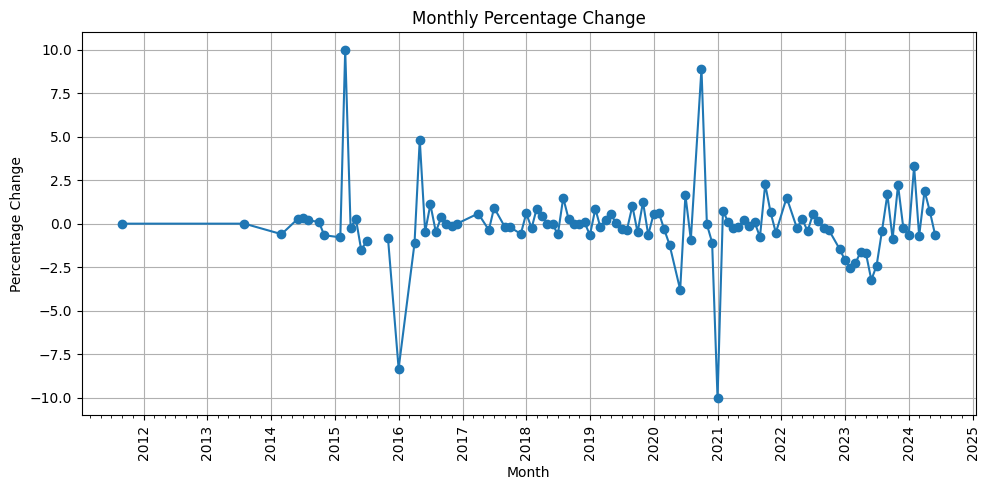

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_path = 'rerun_sentiments.xlsx'
monthly_sentiments = pd.read_excel(file_path, sheet_name='monthly sentiments')

monthly_sentiments['Month'] = pd.to_datetime(monthly_sentiments['Month'])

plt.figure(figsize=(10, 5))
plt.plot(monthly_sentiments['Month'], monthly_sentiments['Percentage Change'], marker='o')
plt.title('Monthly Percentage Change')
plt.xlabel('Month')
plt.ylabel('Percentage Change')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator([1, 3, 5, 7, 9, 11]))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


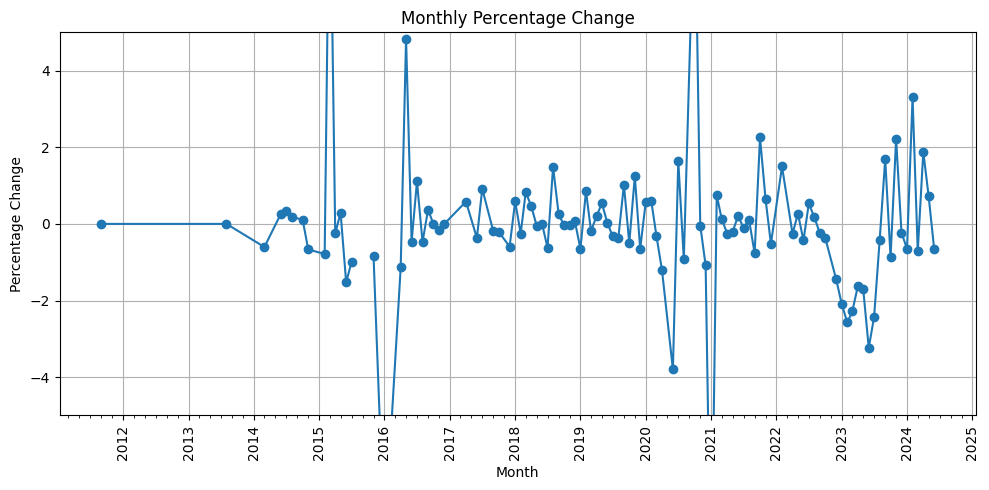

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_path = 'rerun_sentiments.xlsx'
monthly_sentiments = pd.read_excel(file_path, sheet_name='monthly sentiments')

monthly_sentiments['Month'] = pd.to_datetime(monthly_sentiments['Month'])

plt.figure(figsize=(10, 5))
plt.plot(monthly_sentiments['Month'], monthly_sentiments['Percentage Change'], marker='o')
plt.title('Monthly Percentage Change')
plt.xlabel('Month')
plt.ylabel('Percentage Change')

plt.ylim(-5, 5)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator([1, 3, 5, 7, 9, 11]))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


### Quarterly

In [16]:
import pandas as pd

file_path = 'rerun_sentiments.xlsx'
df = pd.read_excel(file_path, sheet_name='master')

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df['Quarter'] = df['Date'].dt.to_period('Q')

grouped = df.groupby('Quarter').agg(
    Average_Sentiment=('Sentiments', 'mean'),
    Frequency=('Sentiments', 'count')
).reset_index()

with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    grouped.to_excel(writer, sheet_name='quarterly sentiments', index=False)


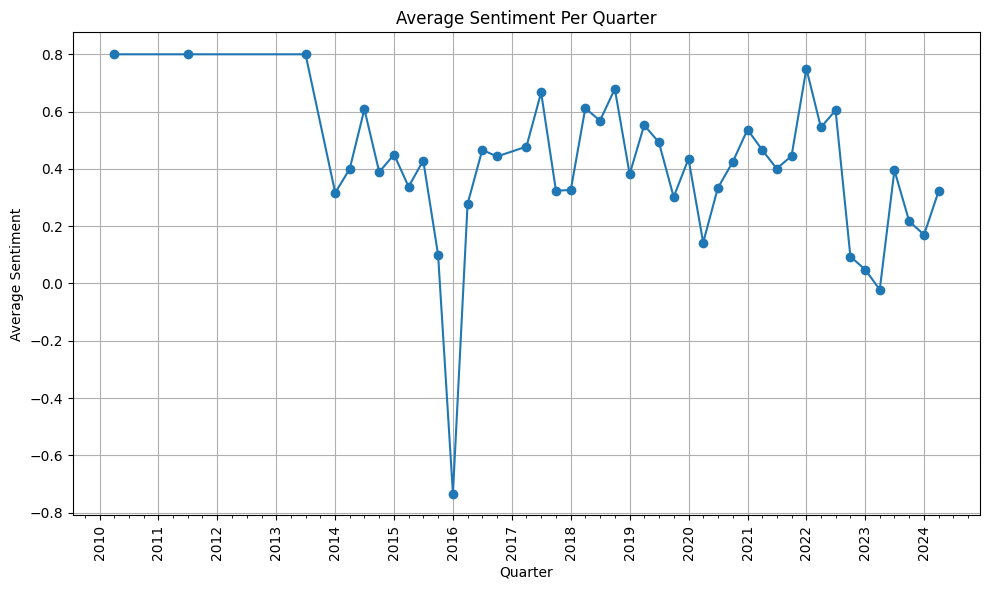

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# read the Excel file
file_path = 'rerun_sentiments.xlsx'
monthly_sentiments = pd.read_excel(file_path, sheet_name='quarterly sentiments')

# extract year and quarter and create a datetime-like object
monthly_sentiments['Year'] = monthly_sentiments['Quarter'].str[:4].astype(int)
monthly_sentiments['Quarter_Num'] = monthly_sentiments['Quarter'].str[-1].astype(int)
monthly_sentiments['Date'] = pd.to_datetime(monthly_sentiments['Year'].astype(str) + '-' + 
                                            ((monthly_sentiments['Quarter_Num'] - 1) * 3 + 1).astype(str) + '-01')

# plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sentiments['Date'], monthly_sentiments['Average_Sentiment'], marker='o')

plt.xlabel('Quarter')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Per Quarter')

plt.gca().xaxis.set_major_locator(mdates.YearLocator() )
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator([1,4,7,10]))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()


#### Quarter on Quarter

In [18]:
import pandas as pd

file_path = 'rerun_sentiments.xlsx'
monthly_sentiments = pd.read_excel(file_path, sheet_name='quarterly sentiments')

monthly_sentiments['Percentage Change'] = monthly_sentiments['Average_Sentiment'].pct_change()

with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    monthly_sentiments.to_excel(writer, sheet_name='quarterly sentiments', index=False)


/var/folders/t3/4f3r77m96393n7bqz6cbqc980000gn/T/ipykernel_69023/2416316965.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_sentiments['Quarter'] = pd.to_datetime(monthly_sentiments['Quarter'])


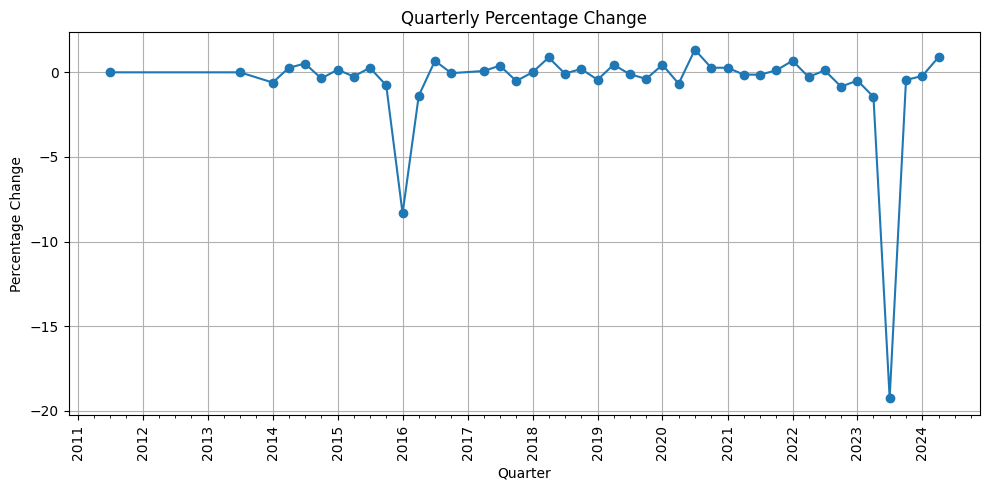

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_path = 'rerun_sentiments.xlsx'
monthly_sentiments = pd.read_excel(file_path, sheet_name='quarterly sentiments')

monthly_sentiments['Quarter'] = pd.to_datetime(monthly_sentiments['Quarter'])

plt.figure(figsize=(10, 5))
plt.plot(monthly_sentiments['Quarter'], monthly_sentiments['Percentage Change'], marker='o')
plt.title('Quarterly Percentage Change')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator([1, 4, 7, 10]))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/t3/4f3r77m96393n7bqz6cbqc980000gn/T/ipykernel_69023/2844110830.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_sentiments['Quarter'] = pd.to_datetime(monthly_sentiments['Quarter'])


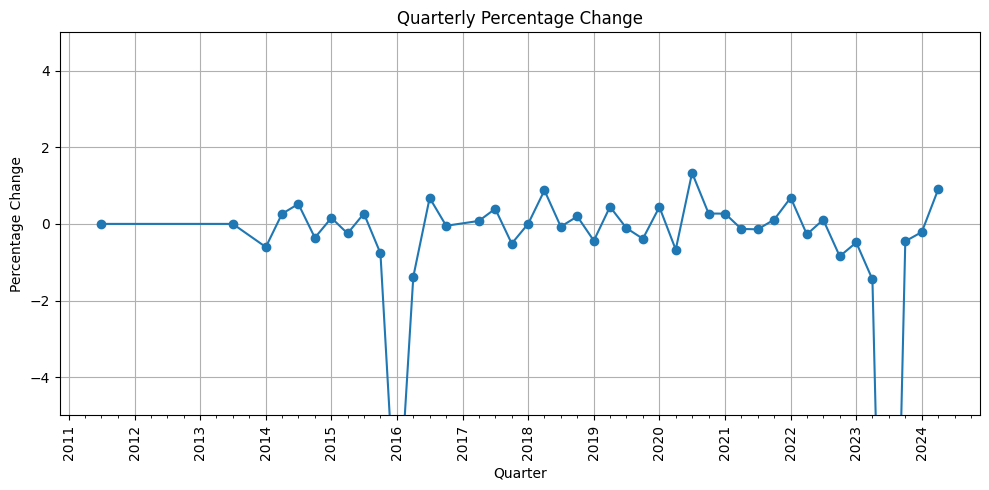

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_path = 'rerun_sentiments.xlsx'
monthly_sentiments = pd.read_excel(file_path, sheet_name='quarterly sentiments')

monthly_sentiments['Quarter'] = pd.to_datetime(monthly_sentiments['Quarter'])

plt.figure(figsize=(10, 5))
plt.plot(monthly_sentiments['Quarter'], monthly_sentiments['Percentage Change'], marker='o')
plt.title('Quarterly Percentage Change')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator([1, 4, 7, 10]))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.ylim(-5, 5)

plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


### Year

In [21]:
import pandas as pd

file_path = 'rerun_sentiments.xlsx'
df = pd.read_excel(file_path, sheet_name='master')

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df['Year'] = df['Date'].dt.to_period('Y')

grouped = df.groupby('Year').agg(
    Average_Sentiment=('Sentiments', 'mean'),
    Frequency=('Sentiments', 'count')
).reset_index()

with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    grouped.to_excel(writer, sheet_name='yearly sentiments', index=False)


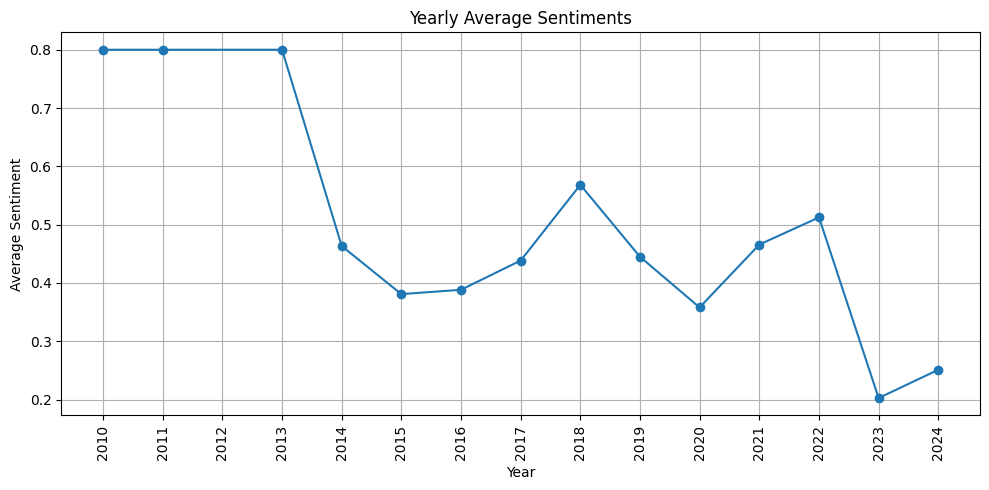

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_path = 'rerun_sentiments.xlsx'
yearly_sentiments = pd.read_excel(file_path, sheet_name='yearly sentiments')

yearly_sentiments['Year'] = pd.to_datetime(yearly_sentiments['Year'], format='%Y')

plt.figure(figsize=(10, 5))
plt.plot(yearly_sentiments['Year'], yearly_sentiments['Average_Sentiment'], marker='o')
plt.title('Yearly Average Sentiments')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Year on Year

In [23]:
import pandas as pd

file_path = 'rerun_sentiments.xlsx'
monthly_sentiments = pd.read_excel(file_path, sheet_name='yearly sentiments')

monthly_sentiments['Percentage Change'] = monthly_sentiments['Average_Sentiment'].pct_change()

with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    monthly_sentiments.to_excel(writer, sheet_name='yearly sentiments', index=False)

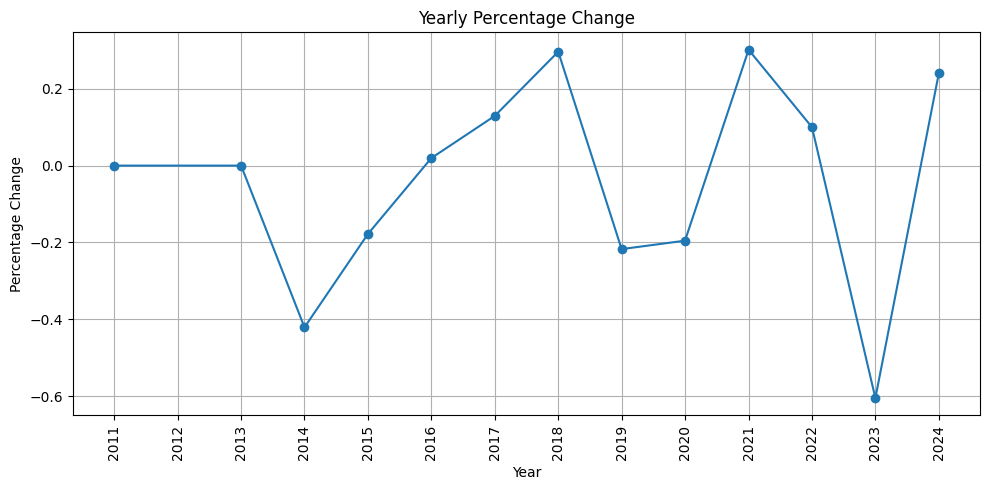

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_path = 'rerun_sentiments.xlsx'
yearly_sentiments = pd.read_excel(file_path, sheet_name='yearly sentiments')

yearly_sentiments['Year'] = pd.to_datetime(yearly_sentiments['Year'], format='%Y')

plt.figure(figsize=(10, 5))
plt.plot(yearly_sentiments['Year'], yearly_sentiments['Percentage Change'], marker='o')
plt.title('Yearly Percentage Change')
plt.xlabel('Year')
plt.ylabel('Percentage Change')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()



# Graph for Slide Deck

/var/folders/t3/4f3r77m96393n7bqz6cbqc980000gn/T/ipykernel_79441/327833076.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Quarter'] = pd.to_datetime(df['Quarter'], errors='coerce')


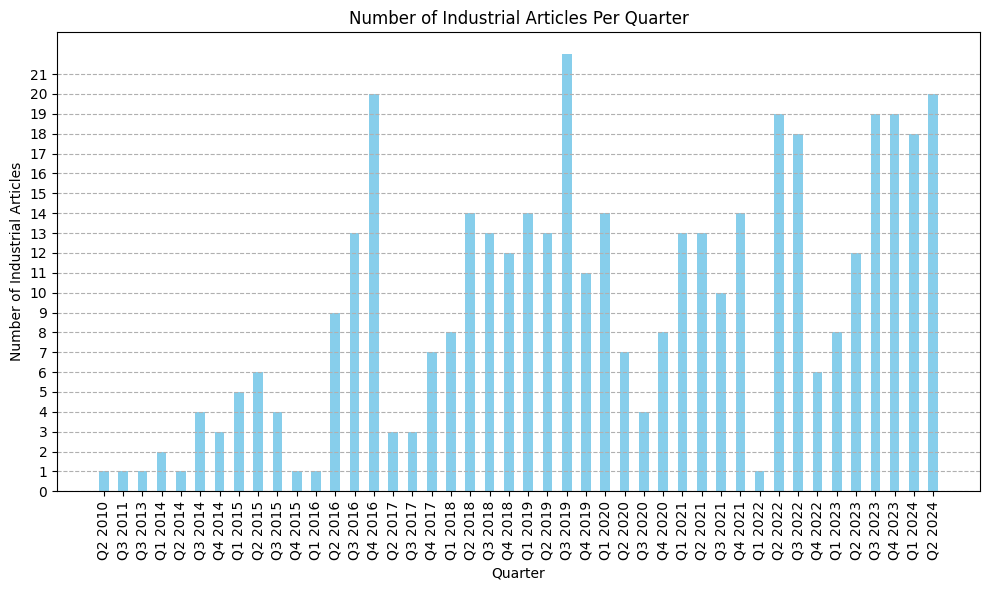

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'rerun_sentiments.xlsx'
sheet_name = 'quarterly sentiments'
df = pd.read_excel(file_path, sheet_name=sheet_name)

df['Quarter'] = pd.to_datetime(df['Quarter'], errors='coerce')

if df['Quarter'].isnull().any():
    print("Warning: Some 'Quarter' values could not be converted to datetime.")

df = df.sort_values(by='Quarter')

def format_quarter(date):
    quarter = (date.month - 1) // 3 + 1
    return f"Q{quarter} {date.year}"
x_labels = df['Quarter'].apply(format_quarter)

max_frequency = df['Frequency'].max()

plt.figure(figsize=(10, 6))
plt.bar(x_labels, df['Frequency'], width=0.5, color='skyblue')

plt.xlabel('Quarter')
plt.ylabel('Number of Industrial Articles')
plt.title('Number of Industrial Articles Per Quarter')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max_frequency, 1))
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()


/var/folders/t3/4f3r77m96393n7bqz6cbqc980000gn/T/ipykernel_79441/3379400777.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Quarter'] = pd.to_datetime(df['Quarter'], errors='coerce')


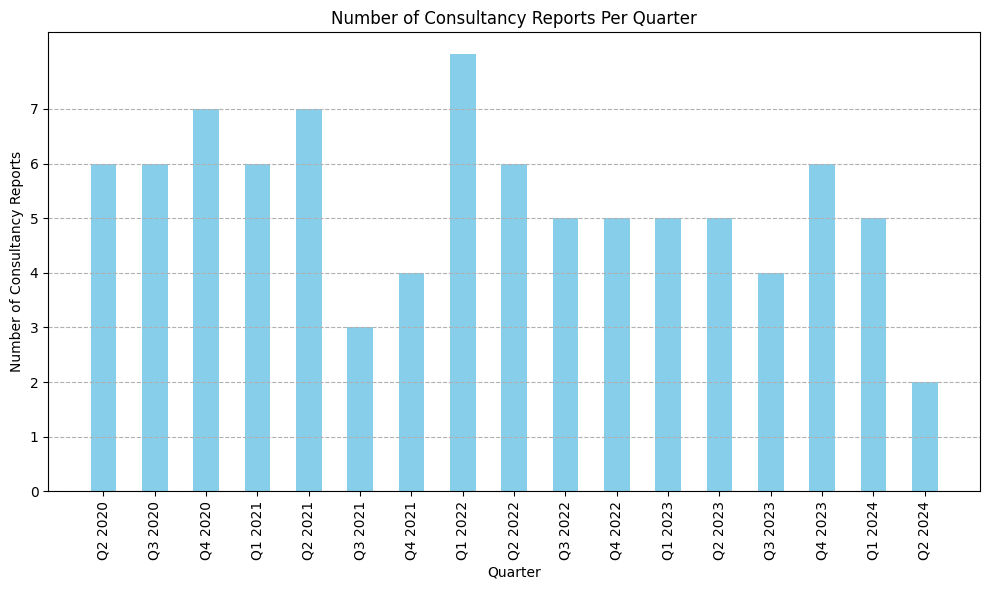

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = './consultancy/consultancy_sentiments.xlsx'
sheet_name = 'quarterly sentiments'
df = pd.read_excel(file_path, sheet_name=sheet_name)

df['Quarter'] = pd.to_datetime(df['Quarter'], errors='coerce')

if df['Quarter'].isnull().any():
    print("Warning: Some 'Quarter' values could not be converted to datetime.")

df = df.sort_values(by='Quarter')

def format_quarter(date):
    quarter = (date.month - 1) // 3 + 1
    return f"Q{quarter} {date.year}"
x_labels = df['Quarter'].apply(format_quarter)

max_frequency = df['Frequency'].max()

plt.figure(figsize=(10, 6))
plt.bar(x_labels, df['Frequency'], width=0.5, color='skyblue')

plt.xlabel('Quarter')
plt.ylabel('Number of Consultancy Reports')
plt.title('Number of Consultancy Reports Per Quarter')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max_frequency, 1))
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()
